In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

#configuration d'affichage
%matplotlib inline
sns.set(style="whitegrid")

In [3]:
df=pd.read_csv('/Users/ambreservaege/Desktop/DATA/Python/diabetes.csv')

In [5]:
#afficher les données 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

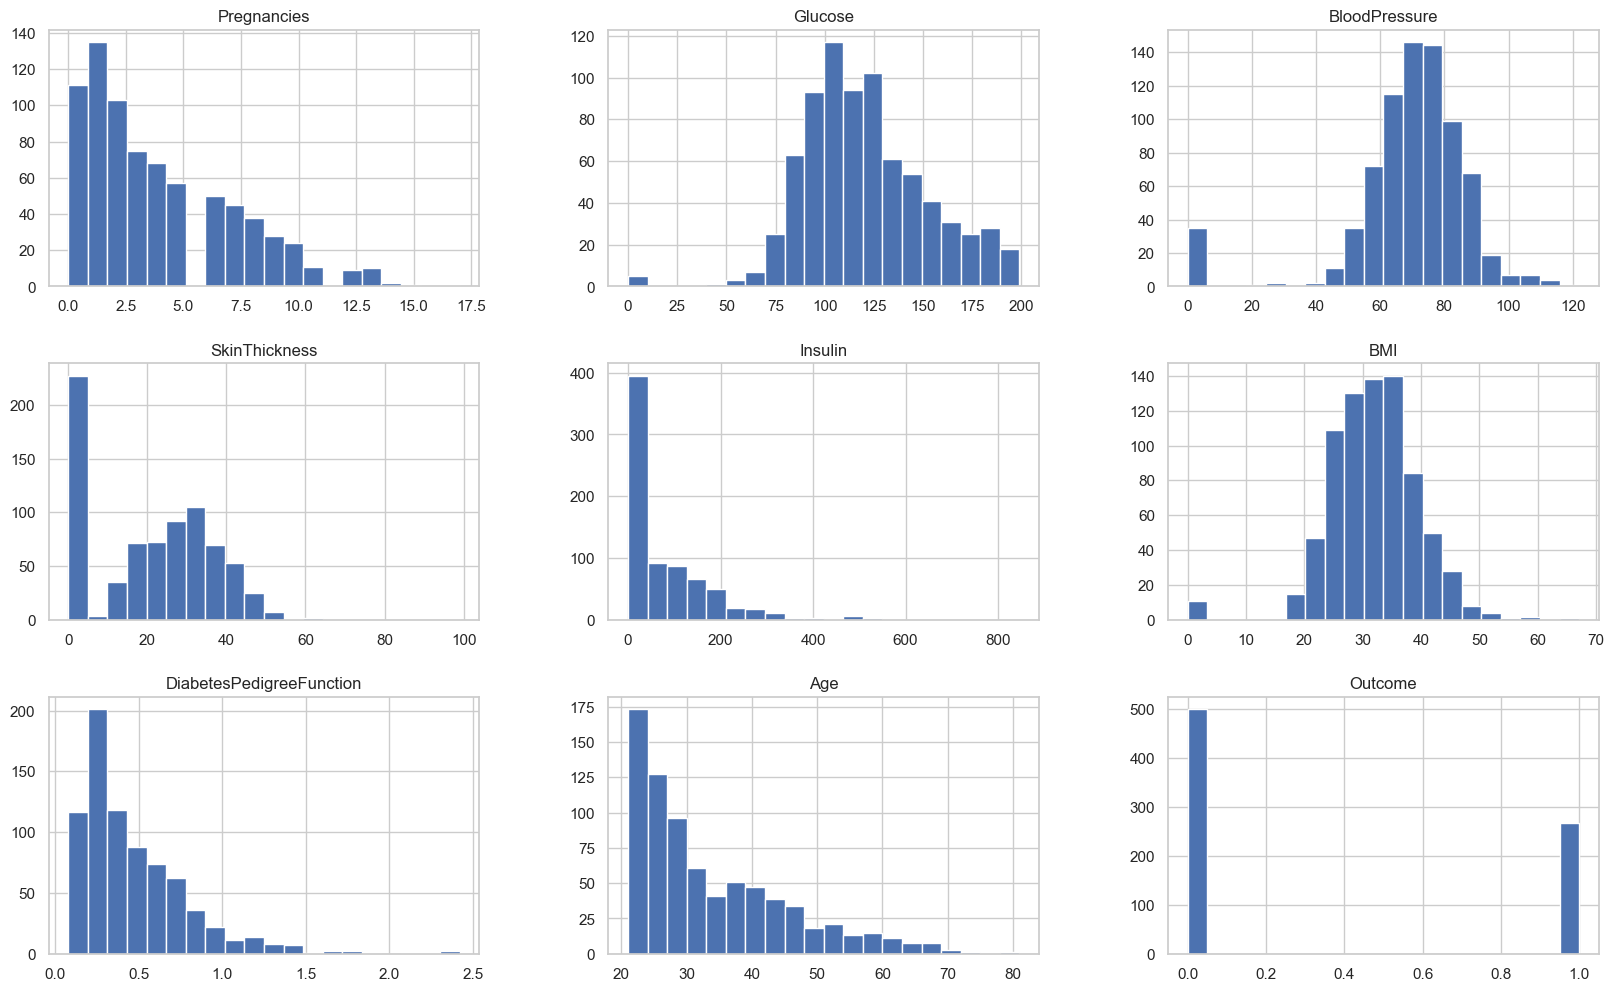

In [25]:
df.hist(bins=20, figsize=(20,12))

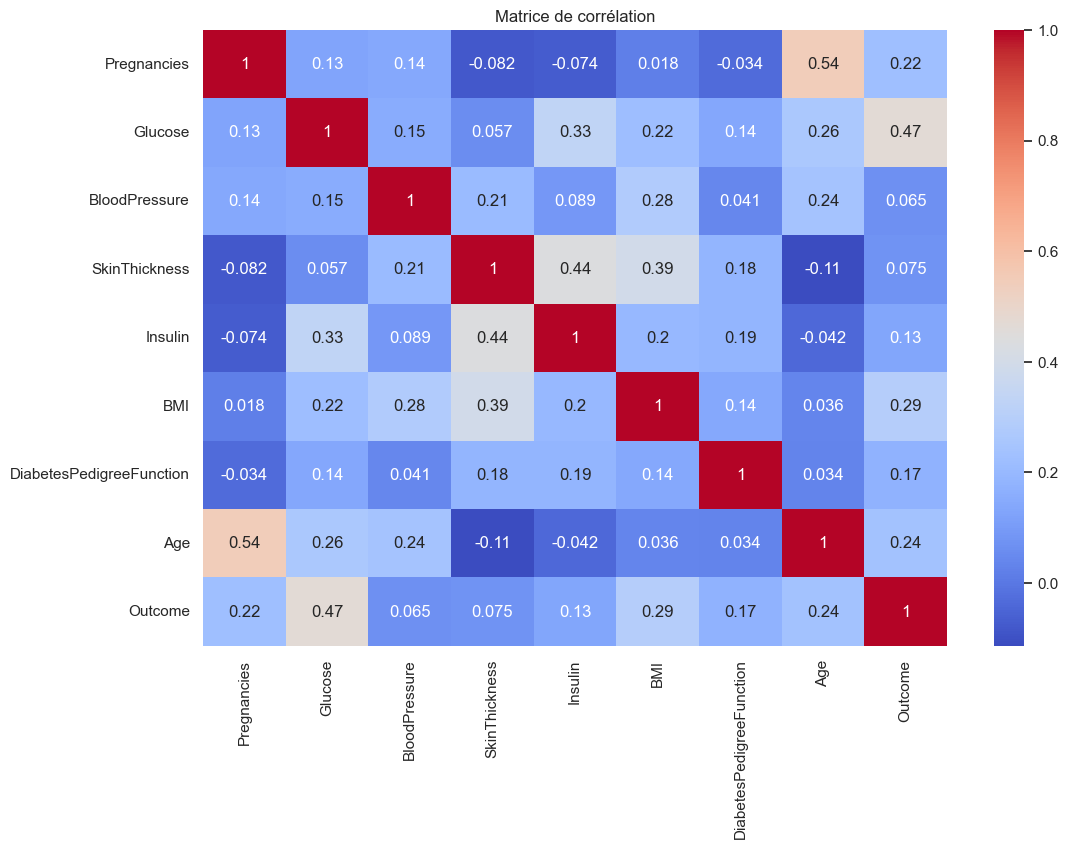

In [27]:
#matrice de corrélation 
corr_matrix=df.corr(numeric_only=True)

#affichage de la matrice 
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [31]:
#Grace à la matrice de corrélation 
#on peut voir que le diabète est fortement corrélé avec les grossesses, l'âge ou encore la consommation de glucose

In [35]:
#valeurs manquantes 
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [47]:
#pour remplacer les valeurs manquantes on fait une imputation de la médiane
median_glucose = df["Glucose"].astype("float").median(axis=0)
print("médiane Glucose:", median_glucose)

médiane Glucose: 117.0


In [53]:
median_blood_pressure = df["BloodPressure"].astype("float").median(axis=0)
print("Mediane pression artérielle:", median_blood_pressure)

Mediane pression artérielle: 72.0


In [55]:
df["Glucose"].replace(np.nan, median_glucose, inplace=True)
df["BloodPressure"].replace(np.nan, median_blood_pressure, inplace=True)

/var/folders/k6/1bq29smd64zb7bjzpz68g0_w0000gn/T/ipykernel_87215/2163584817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Glucose"].replace(np.nan, median_glucose, inplace=True)


In [57]:
#verification des valeurs manquantes 
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


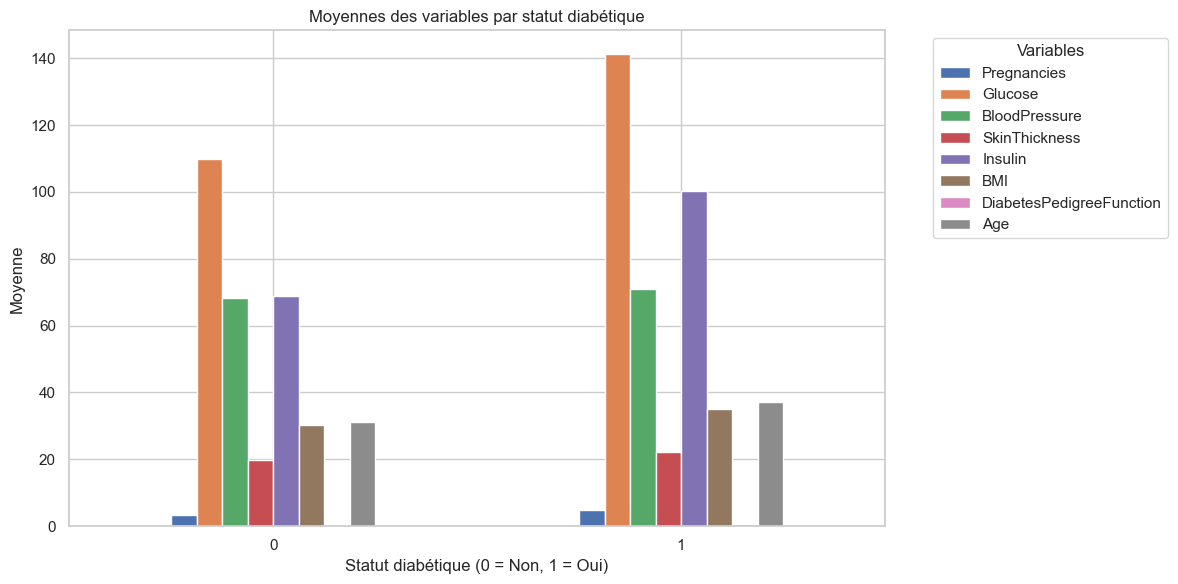

In [61]:
#moyenne des diabétiques et des non diabétiques 
means = df.groupby('Outcome').mean()
means.plot(kind='bar', figsize=(12, 6))
plt.title('Moyennes des variables par statut diabétique')
plt.xlabel('Statut diabétique (0 = Non, 1 = Oui)')
plt.ylabel('Moyenne')
plt.xticks(rotation=0)
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [63]:
#le glucose et l'insuline est la variable qui différencie le plus les diabétiques des non diabétiques

/var/folders/k6/1bq29smd64zb7bjzpz68g0_w0000gn/T/ipykernel_87215/1448183220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2')


Text(0, 0.5, 'Niveau de Glucose')

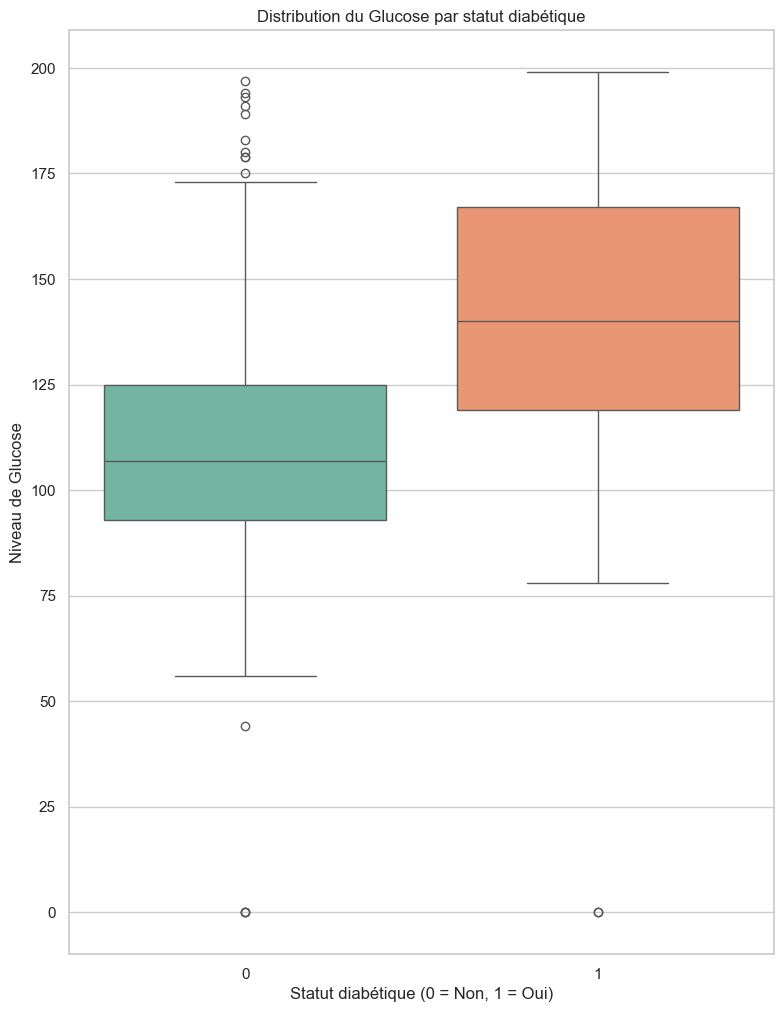

In [73]:
plt.figure(figsize=(20,12))
plt.subplot(1, 2, 1)
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2')
plt.title('Distribution du Glucose par statut diabétique')
plt.xlabel('Statut diabétique (0 = Non, 1 = Oui)')
plt.ylabel('Niveau de Glucose')

/var/folders/k6/1bq29smd64zb7bjzpz68g0_w0000gn/T/ipykernel_87215/482969436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df, palette='Set2')


Text(0, 0.5, 'Indice de Masse Corporelle (IMC)')

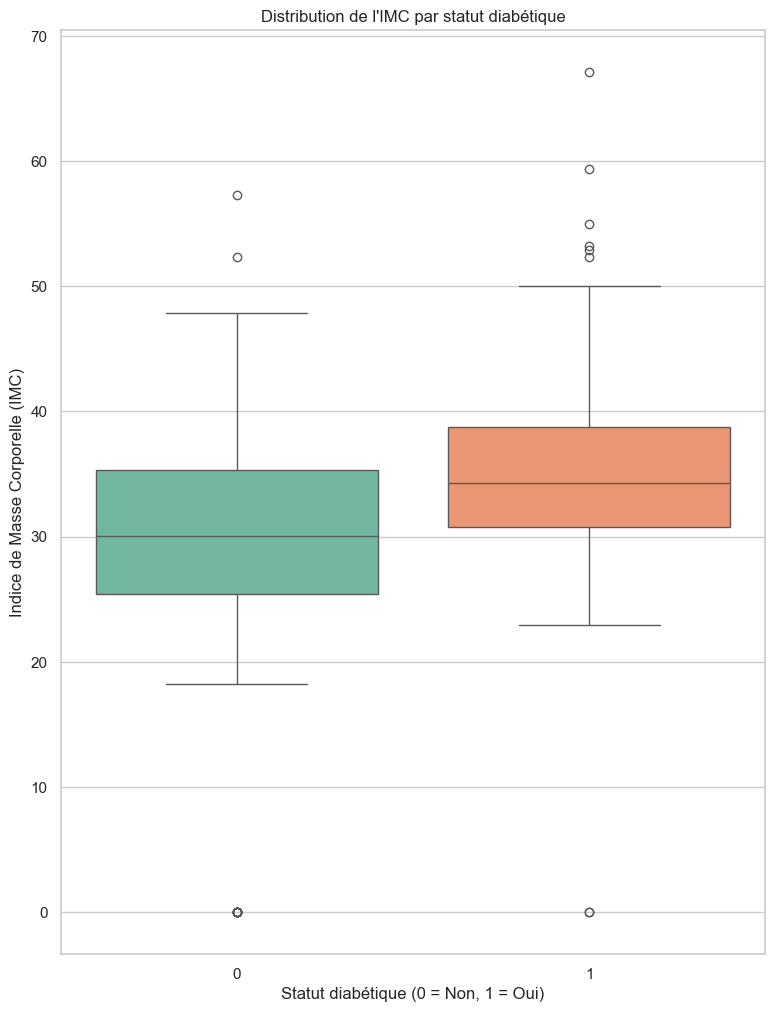

In [79]:
plt.figure(figsize=(20,12))
plt.subplot(1, 2, 2)
sns.boxplot(x='Outcome', y='BMI', data=df, palette='Set2')
plt.title('Distribution de l\'IMC par statut diabétique')
plt.xlabel('Statut diabétique (0 = Non, 1 = Oui)')
plt.ylabel('Indice de Masse Corporelle (IMC)')

In [81]:
#on peut voir que le taux de glucose est plus élevé chez les personnes diabétiques et qu'elles ont
#tendance à avoir plus de masse corporelle 

/var/folders/k6/1bq29smd64zb7bjzpz68g0_w0000gn/T/ipykernel_87215/2518093876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Age', data=df, palette='Set2', inner='quartile')


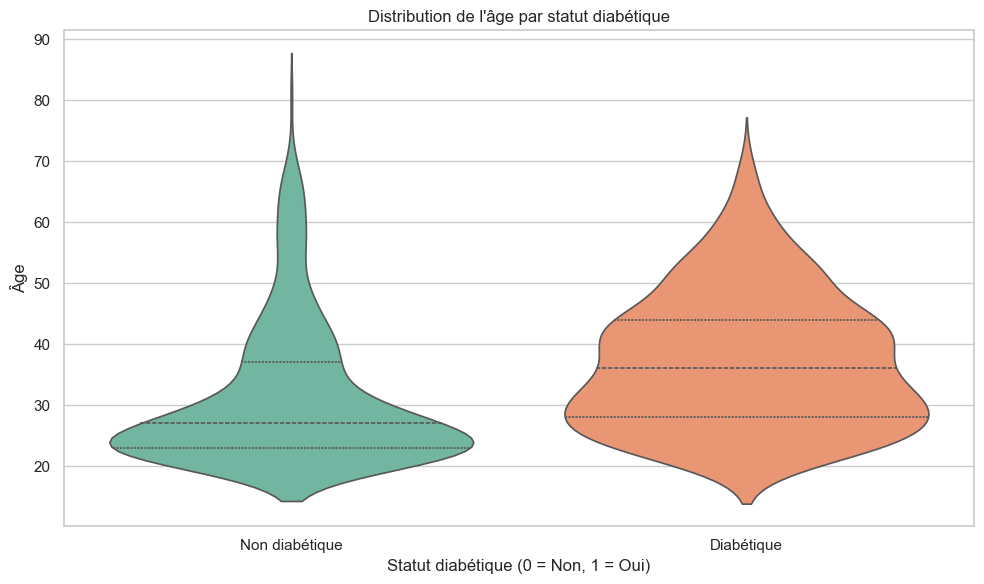

In [83]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outcome', y='Age', data=df, palette='Set2', inner='quartile')
plt.title('Distribution de l\'âge par statut diabétique')
plt.xlabel('Statut diabétique (0 = Non, 1 = Oui)')
plt.ylabel('Âge')
plt.xticks(ticks=[0, 1], labels=['Non diabétique', 'Diabétique'])

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

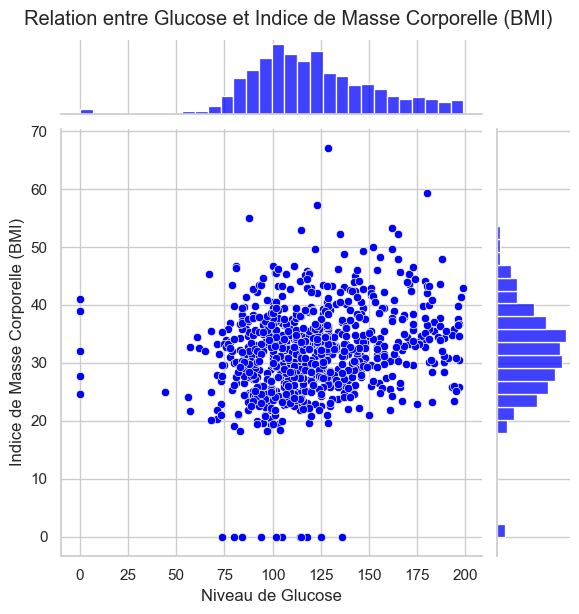

In [85]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='Glucose', y='BMI', data=df, kind='scatter', color='blue', marginal_kws=dict(bins=30, fill=True))
plt.suptitle('Relation entre Glucose et Indice de Masse Corporelle (BMI)', y=1.02)
plt.xlabel('Niveau de Glucose')
plt.ylabel('Indice de Masse Corporelle (BMI)')
plt.show()

In [91]:
# Définir les seuils
glucose_threshold = 140
bmi_threshold = 30
age_threshold = 50

# Identifier les patientes à haut risque
high_risk_patients = df[
    (df['Glucose'] > glucose_threshold) &
    (df['BMI'] > bmi_threshold) &
    (df['Age'] > age_threshold)
]

# Afficher les patientes à haut risque
print("Patientes à haut risque :")
print(high_risk_patients)
print(f"Nombre de patientes à haut risque : {len(high_risk_patients)}")

Patientes à haut risque :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
24            11      143             94             33      146  36.6   
43             9      171            110             24      240  45.4   
53             8      176             90             34      300  33.7   
115            4      146             92              0        0  31.2   
148            5      147             78              0        0  33.7   
186            8      181             68             36      495  30.1   
206            8      196             76             29      280  37.5   
207            5      162            104              0        0  37.7   
212            7      179             95             31        0  34.2   
221            2      158             90              0        0  31.6   
236         

In [97]:
# Créer une fonction pour prédire le diabète
def predict_diabetes(row):
    risk_factors = 0
    if row['Glucose'] > glucose_threshold:
        risk_factors += 1
    if row['BMI'] > bmi_threshold:
        risk_factors += 1
    if row['Age'] > age_threshold:
        risk_factors += 1
    return 1 if risk_factors >= 2 else 0

# Appliquer la fonction à chaque ligne
df['Predicted_Outcome'] = df.apply(predict_diabetes, axis=1)

# Afficher quelques résultats
print("Comparaison des résultats prévus et réels :")
print(df[['Glucose', 'BMI', 'Age', 'Outcome', 'Predicted_Outcome']].head(10))

# Évaluer la performance
accuracy = (df['Outcome'] == df['Predicted_Outcome']).mean()
print(f"Précision du modèle basé sur les seuils : {accuracy:.2f}")

Comparaison des résultats prévus et réels :
   Glucose   BMI  Age  Outcome  Predicted_Outcome
0      148  33.6   50        1                  1
1       85  26.6   31        0                  0
2      183  23.3   32        1                  0
3       89  28.1   21        0                  0
4      137  43.1   33        1                  0
5      116  25.6   30        0                  0
6       78  31.0   26        1                  0
7      115  35.3   29        0                  0
8      197  30.5   53        1                  1
9      125   0.0   54        1                  0
Précision du modèle basé sur les seuils : 0.74


In [99]:
#on peut dire que le glucose, l'âge et la masse corporelle sont les variables qui semblent influencer le plus
#de développement du diabète

In [101]:
#Nous pourrions faire des analyses de corrélation, analyser les résidus ou encore évaluer l'importance des différentes variables